<div class="blue">
<h1><center> <font color='black'> Introduction to Data Science: project  </font></center></h1>
<h2><center> <font color='black'></font> Satisfaction with life environment and local governments in Tallinn  </font>
</center></h2> 
<h2><center> <font color='black'> and traffic accidents with human casualties</font> </center></h2>     
<h2><center> <font color='black''> Liisa Jullinen</font></center></h2>
<h2><center> <font color='black''> December 2024</font></center></h2>
</div>

## 1. Getting and cleaning the data

### Setting up

In [190]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import pearsonr

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
plt.style.use("ggplot")

### Satisfaction of local environment data

In [193]:
# Reading in the satisfacton of local environment data as 'df'
# Read Excel file into DataFrame. Online download link: https://minuomavalitsus.ee/media/1123/download
df = pd.read_excel('2022 KOV rahulolu uuringu andmed - üksikvastused.xlsx', sheet_name='Rahulolu_üksikvastused')

In [194]:
# This is a DF with information about the variables (just in case, not used in here specifically)
Varlabels = pd.read_excel('2022 KOV rahulolu uuringu andmed - üksikvastused.xlsx', sheet_name='Variable Information') 

In [195]:
# Additional information about the variable values (just in case, not used in here specifically)
Varvalues= pd.read_excel('2022 KOV rahulolu uuringu andmed - üksikvastused.xlsx', sheet_name='Variable Values')

### Data on traffic accidents 

In [197]:
# Reading in the data about traffic accidents as 'onnetus' from here:  https://avaandmed.eesti.ee/datasets/inimkannatanutega-liiklusonnetuste-andmed
onnetus = pd.read_csv('Liiklus6nnetused_2011_2022.csv', sep=';')

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\4294965339.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  onnetus = pd.read_csv('Liiklus6nnetused_2011_2022.csv', sep=';')


In [198]:
onnetus.head()

,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Sõidukeid,Vigastatuid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Tee seisund,Teekate,Teekatte seisund [2],Sõiduradade arv,Lubatud sõidukiirus,Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y
0,2000140000057,24.10.2014 08:45,2.0,0,1.0,1,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,Sõidutee on korras,Püsikate,Kuiv,NaN,50.0,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0
1,2000140000067,24.10.2014 13:45,2.0,0,2.0,1,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,Sõidutee on korras,Püsikate,Kuiv,NaN,30.0,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0
2,2000140000123,08.11.2014 15:10,2.0,0,2.0,1,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,Sõidutee on korras,Püsikate,Kuiv,NaN,50.0,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0
3,2000140000235,17.11.2014 17:32,2.0,0,2.0,2,Harju maakond Keila vald,NaN,KEILA - HAAPSALU,NaN,...,Sõidutee on korras,Püsikate,Kuiv,NaN,90.0,Pilvised olud,Pimeda aeg,Pimeda ajal valgustus ei põle,6569324.0,516628.0
4,2000150000442,28.04.2015 07:55,2.0,0,2.0,1,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,Sõidutee on korras,Püsikate,Märg,NaN,50.0,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0


## 2. Cleaning data, feature engineering

### Satisfaction of local environment data

In [202]:
# Original DF head:
df.head()

,id,kaalud,startdate,datestamp,keel,source,Maakond,Omavalitsus,Linnaosa (Tallinn),sugu,...,Q47_13,Q47_14,Q47_15,Q47_16,Q47_17,Q47_18,Q47_19,Q47_20,Q47XMUU,T1
0,5,0.232156,2022-10-19 12:15:04,2022-11-03 21:32:41,ru,1,Harju maakond,Loksa linn,NaN,1,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Я не могу жаловаться на свой город, но хотелос..."
1,68,2.805154,2022-10-20 09:26:41,2022-10-20 09:38:51,ru,1,Harju maakond,Tallinn,Haabersti/Õismäe,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,3.048996,2022-10-19 12:35:30,2022-10-19 13:01:17,et,1,Harju maakond,Tallinn,Kesklinn,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73,2.596113,2022-10-20 22:53:59,2022-10-20 23:06:57,et,1,Harju maakond,Tallinn,Kesklinn,2,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,20,1.724400,2022-10-19 12:40:32,2022-10-19 13:06:24,et,1,Harju maakond,Tallinn,Nõmme,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# Checking number of rows and columns
df.shape

(10416, 218)

In [204]:
#Picking out the variables that we're interested in (some demographic data and data about the personal opinions)
df_short = df[['vanus4', 'Omavalitsus', 'Linnaosa (Tallinn)', 'sugu', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5','Q8_6', 'Q8_7', 
               'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9', 'Q11', 'Q16',  'Q24', 'Q26', 'Q29_6', 'Q13',
            'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'Q20_6','Q20_7', 'Q20_8', 'Q20_9', 'Q21_1',
            'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5','Q21_6', 'Q21_7', 'Q21_8','Q21_9','Q21_10', 'Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q31_1',
        	'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q32_1', 'Q32_2', 'Q32_3', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 
            'Q33_9', 'Q36X1_1', 'Q36X2_2', 'Q36X3_3', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5', 'Q40_6', 'Q40_7', 'Q41_1', 'Q41_2', 'Q42_1', 
            'Q42_2', 'Q42_3', 'Q42_4', 'Q43_1', 'Q43_2', 'Q43_3', 'Q43_4', 'Q44_1', 'Q44_2', 'Q45_1', 'Q46_1']]

In [205]:
#Renaming the columns to more comprehensible labels
# R means 'rahulolu' (satisfaction)
df_short = df_short.rename(columns={
    'Q6': 'Rahvus', 
    'Q7': 'Haridus', 
    'Q8_1': 'Palgatöötaja', 
    'Q8_2': 'Ettevõtja/vabakutseline', 
    'Q8_3': 'Lapsehoolduspuhkusel', 
    'Q8_4': 'Lühiajaline_töötu', 
    'Q8_5': 'Pikaajaline_töötu', 
    'Q8_6':'Töövõimetu', 
    'Q8_7': 'Vanaduspensionär', 
    'Q8_8': 'Üliõpilane', 
    'Q8_9': 'Mittetöötav/kodune', 
    'Q8_10': 'Ajateenija', 
    'Q8_11': 'Muutegevusvorm', 
    'Q9': 'Sissetulek', 
    'Q11':	'Laste arv',
    'Q16':	'Kodutüüp',
    'Q24':	'Liigub jalgsi igapäevaselt',
    'Q26':	'Liigub rattaga kui ilm võimaldab igapäevaselt',
    'Q29_6': 'Mootorrattur',
    'Q13': 'Piirkonnatüüp (linn/maa)',
'Q20_1': 'R eluaseme suurusega', 
'Q20_2': 'R eluaseme seisundiga', 
'Q20_3': 'R eluaseme ligipääsetavusega', 
'Q20_4': 'R eluasemekulutustega', 
'Q20_5': 'R internetiühendusega', 
'Q20_6': 'R elektri varustuskindlusega',
'Q20_7': 'R asukohaga', 
'Q20_8': 'R lähiümbrusega 300 m raadiuses',
'Q20_9': 'R lähiümbrusega 1 km raadiuses',
'Q21_1': 'R rohealadega',
'Q21_2': 'R avalike aladega', 
'Q21_3': 'R liikumis- ja sportimisvõimalustega sisetingimustes', 
'Q21_4': 'R liikumis- ja sportimisvõimalustega välitingimustes',
'Q21_5': 'R mänguväljakutega',
'Q21_6': 'R arhitektuuriga', 
'Q21_7': 'R miljööga',
'Q21_8': 'R hoonete seisukorra ja korrashoiuga',
'Q21_9': 'R tänavavalgustusega',
'Q21_10': 'R ligipääsetavusega avalikele/ühiskondlikele hoonetele',
'Q30_1': 'R jalg- ja kõnniteedega',
'Q30_2': 'R jalgrattateedega',
'Q30_3': 'R	sõiduteedega',
'Q30_4': 'R tänavate hooldamisega suvel',
'Q30_5': 'R tänavate hooldamisega talvel',
'Q31_1': 'R laste, eakate, erivajadustega inimeste liikumisvõimalustega',
'Q31_2': 'R iikluse olukorraga (jalakäija)',
'Q31_3': 'R	liikluse olukorraga (jalgrattur)',
'Q31_4': 'R liikluse olukorraga (autojuht)',
'Q31_5': 'R	autode parkimiskorraldusega',
'Q32_1': 'R ligipääsetavusega ühissõiduki peatustesse',
'Q32_2': 'R	ligipääsetavusega ühissõidukitesse',
'Q32_3': 'R ühistranspordi teenusega',
'Q33_1': 'R jäätmekäitlusega',
'Q33_2': 'R jäätmete liigiti kogumisega',
'Q33_3': 'R	pangaautomaatide kättesaadavusega',
'Q33_4': 'R pakiautomaatide kättesaadavusega',
'Q33_5': 'R kultuursete vaba aja veetmise võimalustega',
'Q33_6': 'R perearsti kaugusega eluasemest',
'Q33_7': 'R põhikoolide kaugusega eluasemest', 
'Q33_8': 'R gümnaasiumide kaugusega eluasemest',
'Q33_9': 'R lasteaedade kaugusega eluasemest',
'Q36X1_1': 'R välisõhu kvaliteediga', 
'Q36X2_2': 'R müratasemega', 
'Q36X3_3': 'R looduskeskkonnaga',
'Q40_1': 'Pean ümbruskonda turvaliseks', 
'Q40_2': 'Tunnen end pimedas väljas liikudes turvaliselt',
'Q40_3': 'Tänavavalgustus on piisav',
'Q40_4': 'eluaseme lähiümbrus on heakorrastatud(ohutu)',
'Q40_5': 'Liikluskäitumine on ohutu',
'Q40_6': 'Teekonna ohutuks läbimiseks on piisavalt kõnni- ja/või rattateid',
'Q40_7': 'palju alkoholijoobes isikuid ümbruskonnas (reversed!!)',
'Q41_1': 'Võtan kogukonnaelust aktiivselt osa',
'Q41_2': 'Tunnen, et saan kodukoha elukeskkonna arengut mõjutada',
'Q42_1': 'R KOV üldise arengusuunaga',
'Q42_2': 'R	elanike kaasamisega KOV arengu kavandamisse ja korraldusse',
'Q42_3': 'R	elanike kaasamisega ruumilise arengu kavandamisse',
'Q42_4': 'R elanike teavitamisega KOV tegevusest ja pakutavatest teenustest',
'Q43_1': 'KOV esindajad tegutsevad professionaalselt',
'Q43_2': 'KOV esindajad täidavad oma ülesandeid eetiliselt',
'Q43_3': 'KOV juhtimine on viimase kolme aasta jooksul paranenud',
'Q43_4': 'KOV üldine areng on viimase kolme aasta jooksul paranenud',
'Q44_1': 'Olen oma elukeskkonnaga rahul',
'Q44_2': 'Olen KOV pakutavate teenustega rahul',
'Q45_1': 'Kui kõrgelt hindate oma elukoha mainet?',
'Q46_1': 'Kui tõenäoliselt soovitaksite oma elukohta elamiseks sõbrale või tuttavale?'
                                 }) 

In [206]:
# Dealing with NAN values
# Some nan-s are marked as '99' in this dataframe. Replacing '99' with nan
df_short = df_short.replace(99, np.nan)

In [207]:
# Some other representations of nans in some columns are turned into np.nans, but not imputed (like the location type and income): 
df_short['Piirkonnatüüp (linn/maa)'].replace(6, np.nan, inplace=True)
# combined_df['Piirkonnatüüp (linn/maa)'].isna().sum()

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\23027958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_short['Piirkonnatüüp (linn/maa)'].replace(6, np.nan, inplace=True)


In [208]:
df_short['Sissetulek'].replace(9, np.nan, inplace=True)

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\358295837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_short['Sissetulek'].replace(9, np.nan, inplace=True)


In [209]:
df_short['Sissetulek'].replace(10, np.nan, inplace=True)
# combined_df['Sissetulek'].isna().sum()

In [210]:
# Checking for Nan values
#df_short.describe()
#df_short.isnull().sum()
df_short.isna().sum()

vanus4                                                                            0
Omavalitsus                                                                       0
Linnaosa (Tallinn)                                                             9417
sugu                                                                              0
Rahvus                                                                            0
                                                                               ... 
KOV üldine areng on viimase kolme aasta jooksul paranenud                      2594
Olen oma elukeskkonnaga rahul                                                    69
Olen KOV pakutavate teenustega rahul                                           1264
Kui kõrgelt hindate oma elukoha mainet?                                         337
Kui tõenäoliselt soovitaksite oma elukohta elamiseks sõbrale või tuttavale?     377
Length: 89, dtype: int64

In [212]:
# Replacing the Nan values 
# Creating a separate df that contains only the opinion-oriented questions (for ease of analysis) and one df for the demographic data

#slicing point
opstart = df_short.columns.get_loc("R eluaseme suurusega") 

# demographic
demographic = df_short.iloc[:, : opstart]

# opinions
opinions = df_short.iloc[:, opstart:] 

# Imputing NA-s in the questions about satisfaction with column mean values 
opinions = opinions.fillna(opinions.mean())

#To check: 
#opinions.isna().sum()

In [233]:
Tallinnshort = df_short[df_short['Omavalitsus'] == 'Tallinn']
Tallinnshort

,vanus4,Omavalitsus,Linnaosa (Tallinn),sugu,Rahvus,Haridus,Palgatöötaja,Ettevõtja/vabakutseline,Lapsehoolduspuhkusel,Lühiajaline_töötu,...,R\telanike kaasamisega ruumilise arengu kavandamisse,R elanike teavitamisega KOV tegevusest ja pakutavatest teenustest,KOV esindajad tegutsevad professionaalselt,KOV esindajad täidavad oma ülesandeid eetiliselt,KOV juhtimine on viimase kolme aasta jooksul paranenud,KOV üldine areng on viimase kolme aasta jooksul paranenud,Olen oma elukeskkonnaga rahul,Olen KOV pakutavate teenustega rahul,Kui kõrgelt hindate oma elukoha mainet?,Kui tõenäoliselt soovitaksite oma elukohta elamiseks sõbrale või tuttavale?
1,3,Tallinn,Haabersti/Õismäe,2,2,3,1,0,0,0,...,10.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,10.0,10.0
2,3,Tallinn,Kesklinn,2,1,2,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,9.0,9.0
3,2,Tallinn,Kesklinn,2,1,3,0,0,1,0,...,10.0,10.0,8.0,8.0,8.0,10.0,10.0,8.0,10.0,10.0
4,2,Tallinn,Nõmme,2,1,3,1,0,0,0,...,5.0,6.0,6.0,6.0,3.0,5.0,9.0,7.0,9.0,10.0
5,4,Tallinn,Kristiine,2,1,3,0,0,0,0,...,5.0,5.0,5.0,1.0,1.0,1.0,5.0,5.0,9.0,9.0


In [24]:
# Just a quick look at correlations without combining features and seeing highly correlated features:
def corrtoself(df):
    drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            drop.add((cols[i], cols[j]))
    return drop

def topcorr(df, n=5):
    corr = df.corr().abs().unstack()
    labels = corrtoself(df)
    corr = corr.drop(labels=labels).sort_values(ascending=False)
    return corr[0:n]

print(topcorr(opinions, 20))

KOV juhtimine on viimase kolme aasta jooksul paranenud         KOV üldine areng on viimase kolme aasta jooksul paranenud                      0.908273
KOV esindajad tegutsevad professionaalselt                     KOV esindajad täidavad oma ülesandeid eetiliselt                               0.898500
R\telanike kaasamisega KOV arengu kavandamisse ja korraldusse  R\telanike kaasamisega ruumilise arengu kavandamisse                           0.869122
R iikluse olukorraga (jalakäija)                               R\tliikluse olukorraga (jalgrattur)                                            0.799972
R KOV üldise arengusuunaga                                     R\telanike kaasamisega KOV arengu kavandamisse ja korraldusse                  0.798021
R lähiümbrusega 300 m raadiuses                                R lähiümbrusega 1 km raadiuses                                                 0.784029
KOV esindajad tegutsevad professionaalselt                     KOV juhtimine on viimase kolme 

In [25]:
## Staring to combine features into intuitively logical groups. Looking at correlations to also help
combined_df = pd.DataFrame() ## for results

In [26]:
#First of all, creating a summarized happiness-with-environment measure (a simple mean of all columns)
combined_df['Üldrahulolu'] = opinions.mean(axis=1)

In [27]:
corr_matrix = opinions.corr()['R KOV üldise arengusuunaga'].abs()
# corr_matrix.sort_values(ascending=False).head(12)

In [28]:
# Calculating and adding a column that represents mean attitudes towards KOV
combined_df['R KOViga'] = opinions[['R KOV üldise arengusuunaga', 'R\telanike kaasamisega KOV arengu kavandamisse ja korraldusse', 
                                 'KOV esindajad tegutsevad professionaalselt', 'R\telanike kaasamisega ruumilise arengu kavandamisse',
                                'KOV esindajad täidavad oma ülesandeid eetiliselt', 'Olen KOV pakutavate teenustega rahul', 
                                'KOV üldine areng on viimase kolme aasta jooksul paranenud', 'R elanike teavitamisega KOV tegevusest ja pakutavatest teenustest',
                                'KOV juhtimine on viimase kolme aasta jooksul paranenud']].mean(axis=1)

In [29]:
corr_matrix = opinions.corr()['Pean ümbruskonda turvaliseks'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [30]:
# Calculating and adding a column that represents mean attitudes towards safety
combined_df['R turvalisus'] = opinions[['Pean ümbruskonda turvaliseks', 'Tunnen end pimedas väljas liikudes turvaliselt']].mean(axis=1)

In [31]:
corr_matrix = opinions.corr()['R lasteaedade kaugusega eluasemest'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [32]:
# Calculating and adding a column that represents mean attitudes towards accesibility to schools
combined_df['Kooli ja arsti lähedus'] = opinions[['R lasteaedade kaugusega eluasemest', 'R põhikoolide kaugusega eluasemest', 
                                                'R gümnaasiumide kaugusega eluasemest', 'R perearsti kaugusega eluasemest']].mean(axis=1)

In [33]:
corr_matrix = opinions.corr()['R eluaseme seisundiga'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [34]:
# Calculating and adding a column that represents mean attitudes towards immediate housing
combined_df['Rahulolu eluruumiga'] = opinions[['R eluaseme seisundiga', 'R eluaseme suurusega', 'R eluasemekulutustega']].mean(axis=1)

In [35]:
corr_matrix = opinions.corr()['R miljööga'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [36]:
# Calculating and adding a column that represents mean attitudes towards the local atmosphere and architecture
combined_df['Avalikud hooned/miljöö'] = opinions[['R miljööga', 'R arhitektuuriga', 'R hoonete seisukorra ja korrashoiuga']].mean(axis=1)

In [37]:
corr_matrix = opinions.corr()['R liikumis- ja sportimisvõimalustega välitingimustes'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [38]:
# Calculating and adding a column that represents mean attitudes towards possibilities to move actively in the outdoors
combined_df['Aktiivne liikumine'] = opinions[['R liikumis- ja sportimisvõimalustega välitingimustes', 'R liikumis- ja sportimisvõimalustega sisetingimustes',
                                            'R avalike aladega', 'R mänguväljakutega', 'R rohealadega']].mean(axis=1)

In [39]:
corr_matrix = opinions.corr()['R lähiümbrusega 1 km raadiuses'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [40]:
# Calculating and adding a column that represents mean attitudes towards location
combined_df['Rahulolu asukohaga'] = opinions[['R lähiümbrusega 300 m raadiuses', 'R lähiümbrusega 1 km raadiuses', 'R asukohaga']].mean(axis=1)

In [41]:
corr_matrix = opinions.corr()['R jalg- ja kõnniteedega'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [42]:
# Calculating and adding a column that represents mean satisfaction with the situation of pederstrians, kids and older
# people in traffic
combined_df['Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'] = opinions[['R jalg- ja kõnniteedega',
                                                                                                'R jalgrattateedega',
                                                                                                'Teekonna ohutuks läbimiseks on piisavalt kõnni- ja/või rattateid',
                                                                                                'R iikluse olukorraga (jalakäija)',
                                                                                                'R\tliikluse olukorraga (jalgrattur)',  
                                                                                                'R laste, eakate, erivajadustega inimeste liikumisvõimalustega',
                                                                                                'Tänavavalgustus on piisav',
                                                                                                'R tänavavalgustusega', 
                                                                                                'Liikluskäitumine on ohutu', 
                                                                                                'eluaseme lähiümbrus on heakorrastatud(ohutu)']].mean(axis=1)

In [43]:
corr_matrix = opinions.corr()['R	sõiduteedega'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [44]:
# Calculating and adding a column that represents mean attitudes towards satisfaction when moving around in a car
combined_df['Rahulolu autoga liikudes'] = opinions[['R	sõiduteedega', 'R tänavate hooldamisega suvel', 'R liikluse olukorraga (autojuht)',
                                                   'R tänavate hooldamisega talvel', 'R	autode parkimiskorraldusega']].mean(axis=1)

In [45]:
corr_matrix = opinions.corr()['R ühistranspordi teenusega'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [46]:
# Calculating and adding a column that represents mean attitudes towards public transport
combined_df['Rahulolu ühistranspordiga'] = opinions[['R ühistranspordi teenusega', 'R\tligipääsetavusega ühissõidukitesse', 
                                                     'R ligipääsetavusega ühissõiduki peatustesse']].mean(axis=1)

In [47]:
corr_matrix = opinions.corr()['R jäätmekäitlusega'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [48]:
# Calculating and adding a column that represents mean attitudes towards recycling/garbage
combined_df['R jäätmekäitlusega'] = opinions[['R jäätmekäitlusega','R jäätmete liigiti kogumisega']].mean(axis=1)

In [49]:
corr_matrix = opinions.corr()['R	pangaautomaatide kättesaadavusega'].abs()
# corr_matrix.sort_values(ascending=False).head(10)


In [50]:
# Calculating and adding a column that represents mean attitudes towards availability of banks and parcel machines
combined_df['Paki- ja pangaautomaadid'] = opinions[['R\tpangaautomaatide kättesaadavusega','R pakiautomaatide kättesaadavusega']].mean(axis=1)

In [51]:
corr_matrix = opinions.corr()['R kultuursete vaba aja veetmise võimalustega'].abs()
# corr_matrix.sort_values(ascending=False).head(10)

In [52]:
# Keeping the satisfaction with cultural recreation alone
combined_df['R kultuursete vaba aja veetmise võimalustega'] = opinions['R kultuursete vaba aja veetmise võimalustega']

In [53]:
corr_matrix = opinions.corr()['R looduskeskkonnaga'].abs()
# corr_matrix.sort_values(ascending=False).head(10)


In [54]:
# Calculating and adding a column that represents mean satisfaction with pollution/clean environment
combined_df['Puhas loodus'] = opinions[['R välisõhu kvaliteediga', 'R müratasemega', 'R looduskeskkonnaga']].mean(axis=1)

In [55]:
corr_matrix = opinions.corr()['Võtan kogukonnaelust aktiivselt osa'].abs()
#corr_matrix.sort_values(ascending=False).head(10)

In [56]:
# Calculating and adding a column that represents mean satisfaction with involvedness in community life
combined_df['Osalen ja mõjutan kogukonnaelu'] = opinions[['Võtan kogukonnaelust aktiivselt osa', 
                                                       'Tunnen, et saan kodukoha elukeskkonna arengut mõjutada']].mean(axis=1)

In [57]:
corr_matrix = opinions.corr()['Olen oma elukeskkonnaga rahul'].abs()
#corr_matrix.sort_values(ascending=False).head(10)

In [58]:
# Calculating and adding a column that represents mean satisfaction with the local envirnment and its reputation
combined_df['Rahulolu ja kogukonna maine'] = opinions[['Olen oma elukeskkonnaga rahul', 'Kui kõrgelt hindate oma elukoha mainet?', 
                                                       'Kui tõenäoliselt soovitaksite oma elukohta elamiseks sõbrale või tuttavale?']].mean(axis=1)

In [59]:
# Yep, it's all correlated
# print(topcorr(combined_df, 40))

In [60]:
# recombining the opinions and demographic data in one dataframe
combined_df = pd.concat([combined_df, demographic], axis=1, ignore_index=False)
combined_df.head()

,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,...,Mittetöötav/kodune,Ajateenija,Muutegevusvorm,Sissetulek,Laste arv,Kodutüüp,Liigub jalgsi igapäevaselt,Liigub rattaga kui ilm võimaldab igapäevaselt,Mootorrattur,Piirkonnatüüp (linn/maa)
0,5.800000,4.222222,9.0,7.75,6.333333,5.000000,4.2,4.333333,6.00000,7.6,...,0,0,0,2.0,2,4,2,2,0,1.0
1,9.566694,8.981680,9.5,10.00,8.666667,10.000000,10.0,10.000000,9.90000,10.0,...,0,0,0,4.0,0,1,1,2,0,1.0
2,7.003174,5.715136,8.0,8.75,5.000000,8.000000,7.4,9.333333,7.07058,4.6,...,0,0,0,3.0,0,1,1,2,0,1.0
3,9.215385,9.111111,9.0,6.25,8.666667,10.000000,10.0,9.333333,9.90000,9.6,...,0,0,0,8.0,0,1,1,2,0,1.0
4,7.707692,5.888889,9.5,7.50,8.666667,7.666667,9.4,10.000000,7.00000,6.2,...,0,0,0,2.0,2,1,1,1,0,1.0


In [93]:
## Since the plan is to analyze data on Tallinn only, making yet another df of the opinion-related questions regarding only Tallinn inhabitants
Tallinn = combined_df[combined_df["Omavalitsus"] == 'Tallinn']
op_end = Tallinn.columns.get_loc("vanus4") 

# opinions
opTallinn = Tallinn.iloc[:, : op_end] 


Tallinn.head()


,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,...,Mittetöötav/kodune,Ajateenija,Muutegevusvorm,Sissetulek,Laste arv,Kodutüüp,Liigub jalgsi igapäevaselt,Liigub rattaga kui ilm võimaldab igapäevaselt,Mootorrattur,Piirkonnatüüp (linn/maa)
1,9.566694,8.981680,9.5,10.00,8.666667,10.000000,10.0,10.000000,9.90000,10.0,...,0,0,0,4.0,0,1,1,2,0,1.0
2,7.003174,5.715136,8.0,8.75,5.000000,8.000000,7.4,9.333333,7.07058,4.6,...,0,0,0,3.0,0,1,1,2,0,1.0
3,9.215385,9.111111,9.0,6.25,8.666667,10.000000,10.0,9.333333,9.90000,9.6,...,0,0,0,8.0,0,1,1,2,0,1.0
4,7.707692,5.888889,9.5,7.50,8.666667,7.666667,9.4,10.000000,7.00000,6.2,...,0,0,0,2.0,2,1,1,1,0,1.0
5,7.076923,3.666667,8.0,9.00,10.000000,10.000000,9.0,10.000000,6.40000,4.6,...,0,0,0,2.0,0,1,1,2,0,1.0


## Traffic accident data

In [96]:
# Filtering out accidents regarding Tallinn
Tallinnonnetus = onnetus[onnetus['Omavalitsus (PPA)'] == 'Tallinn']

In [98]:
# Renaming municipality column
Tallinnonnetus = Tallinnonnetus.rename(columns={
    'Asustus (PPA)': 'Linnaosa'}) 

In [100]:
# And municipalities
Tallinnonnetus.Linnaosa.replace(['Kesklinna linnaosa', 'Põhja-Tallinna linnaosa', 'Pirita linnaosa',
       'Haabersti linnaosa', 'Lasnamäe linnaosa', 'Mustamäe linnaosa',
       'Nõmme linnaosa', 'Kristiine linnaosa'], 
        ['Kesklinn', 'Põhja-Tallinn', 'Pirita/Merivälja', 'Haabersti/Õismäe', 'Lasnamäe', 'Mustamäe', 'Nõmme', 'Kristiine'], inplace=True)
Tallinnonnetus.head()

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\98091175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Tallinnonnetus.Linnaosa.replace(['Kesklinna linnaosa', 'Põhja-Tallinna linnaosa', 'Pirita linnaosa',


,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Sõidukeid,Vigastatuid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Tee seisund,Teekate,Teekatte seisund [2],Sõiduradade arv,Lubatud sõidukiirus,Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y
0,2000140000057,24.10.2014 08:45,2.0,0,1.0,1,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,Sõidutee on korras,Püsikate,Kuiv,NaN,50.0,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0
1,2000140000067,24.10.2014 13:45,2.0,0,2.0,1,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,Sõidutee on korras,Püsikate,Kuiv,NaN,30.0,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0
2,2000140000123,08.11.2014 15:10,2.0,0,2.0,1,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,Sõidutee on korras,Püsikate,Kuiv,NaN,50.0,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0
4,2000150000442,28.04.2015 07:55,2.0,0,2.0,1,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,Sõidutee on korras,Püsikate,Märg,NaN,50.0,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0
5,2000220000016,28.10.2022 18:31,2.0,0,2.0,1,Harju maakond Tallinn Kesklinna linnaosa Last...,46a,Lastekodu tn,NaN,...,Sõidutee on korras,Püsikate,Kuiv,NaN,50.0,Pilvised olud,Pimeda aeg,Pimeda ajal valgustus põleb,6587977.0,543992.0


In [102]:
liiklus = pd.DataFrame()
liiklus['õnnetuste arv'] = Tallinnonnetus.groupby('Linnaosa')['Linnaosa'].count()
liiklus['Hukkunuid'] = Tallinnonnetus.groupby('Linnaosa')['Hukkunuid'].sum()
liiklus['Vigastatuid'] = Tallinnonnetus.groupby('Linnaosa')['Vigastatuid'].sum()
liiklus['Isikuid'] = Tallinnonnetus.groupby('Linnaosa')['Isikuid'].sum()
liiklus['Joobes mootorsõidukijuhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Joobes mootorsõidukijuhi osalusel'].sum()
liiklus['Kergliikurijuhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Kergliikurijuhi osalusel'].sum()
liiklus['Jalakäija osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Jalakäija osalusel'].sum()
liiklus['Kaassõitja osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Kaassõitja osalusel'].sum()
liiklus['Maastikusõiduki juhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Maastikusõiduki juhi osalusel'].sum()
liiklus['Jalgratturi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Jalgratturi osalusel'].sum()
liiklus['Eaka (65+) mootorsõidukijuhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Eaka (65+) mootorsõidukijuhi osalusel'].sum()
liiklus['Bussijuhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Bussijuhi osalusel'].sum()
liiklus['Veoautojuhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Veoautojuhi osalusel'].sum()
liiklus['Ühissõidukijuhi osalusel'] = Tallinnonnetus.groupby('Linnaosa')['Ühissõidukijuhi osalusel'].sum()
liiklus['Elanikke'] = [47980, 65042, 32725, 117230, 65978, 37404, 19034, 59612] ## Tallinna linnavalitsus
liiklus['Pindala_km2'] = [18.6, 30.6, 9.4, 27.41, 8.15, 28, 18.7, 17.3] ## Wikipedia
liiklus['Hukkunuid/km2'] = liiklus['Hukkunuid'] / liiklus['Pindala_km2']
liiklus['Hukkunuid/10000 elaniku kohta'] = liiklus['Hukkunuid'] / liiklus['Elanikke'] * 10000
liiklus['Vigastatuid/km2'] = liiklus['Vigastatuid'] / liiklus['Pindala_km2']
liiklus['Vigastatuid/1000'] = liiklus['Vigastatuid'] /  liiklus['Elanikke'] * 1000
liiklus['Õnnetusi/ km2'] = liiklus['õnnetuste arv'] / liiklus['Pindala_km2']

## Data exploration

In [105]:
# Apply the default theme
sns.set_theme()

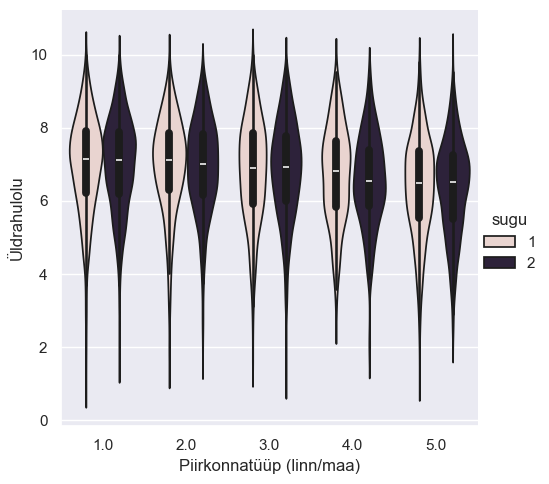

In [107]:
## Looking at the Estonian data
sns.catplot(data=combined_df, kind="violin", x="Piirkonnatüüp (linn/maa)", y="Üldrahulolu", hue="sugu")

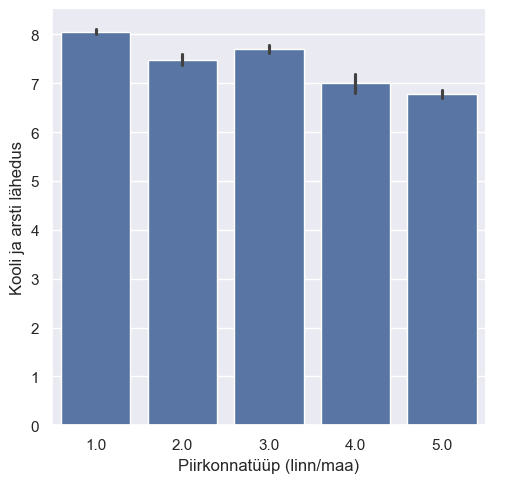

In [108]:
sns.catplot(data=combined_df, kind="bar", x='Piirkonnatüüp (linn/maa)', y="Kooli ja arsti lähedus")

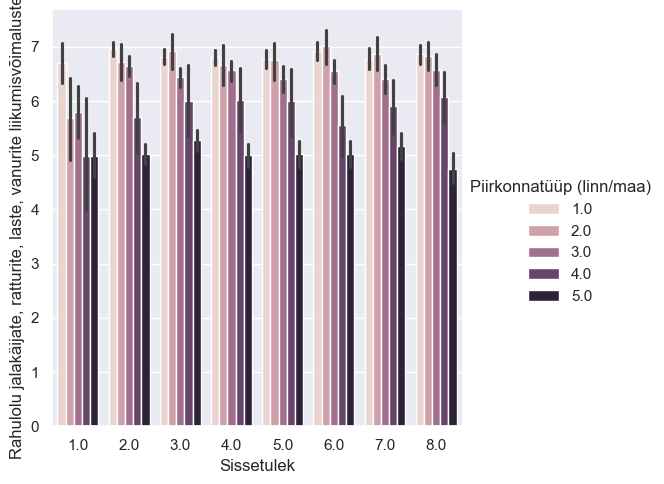

In [110]:
sns.catplot(data=combined_df, kind="bar", x="Sissetulek", y="Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",  hue="Piirkonnatüüp (linn/maa)")

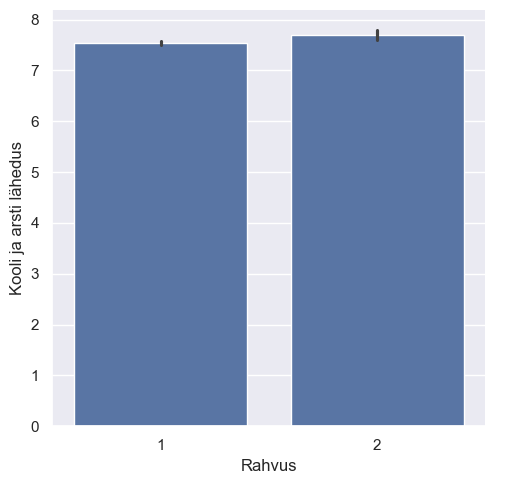

In [111]:
sns.catplot(data=combined_df, kind="bar", x="Rahvus", y="Kooli ja arsti lähedus")

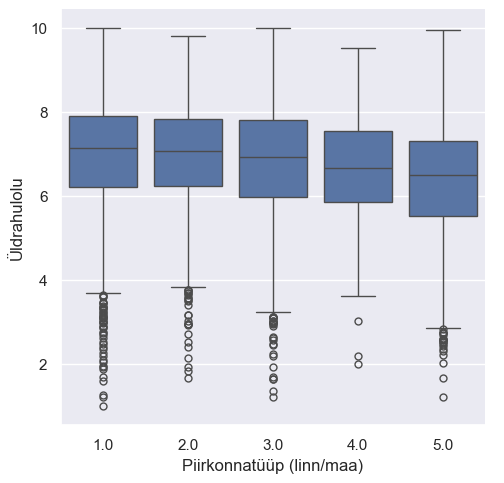

In [113]:
sns.catplot(data=combined_df, x="Piirkonnatüüp (linn/maa)", y="Üldrahulolu", kind="box")

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Haabersti/Õismäe'),
  Text(1, 0, 'Kesklinn'),
  Text(2, 0, 'Nõmme'),
  Text(3, 0, 'Kristiine'),
  Text(4, 0, 'Lasnamäe'),
  Text(5, 0, 'Mustamäe'),
  Text(6, 0, 'Põhja-Tallinn'),
  Text(7, 0, 'Pirita/Merivälja')])

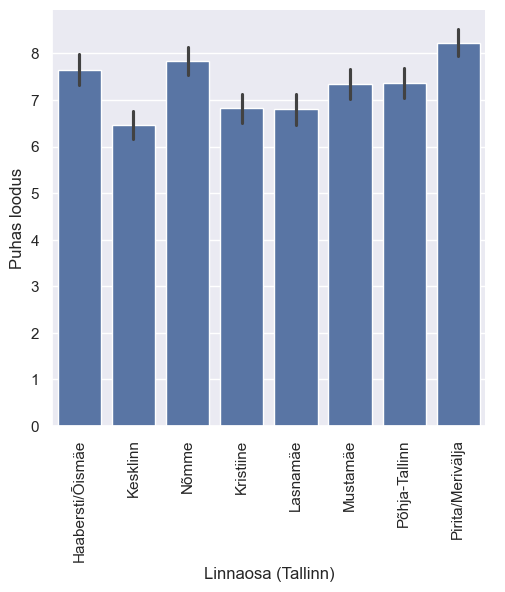

In [114]:
## Looking at Tallinn data
sns.catplot(data=Tallinn, kind="bar", x="Linnaosa (Tallinn)", y="Puhas loodus")
plt.xticks(rotation=90)

## Clustering

In [116]:
# Just looked at how people can be clustered according to their answers, seems there are people, who in general are more positive and people, 
# who are in general more negative
Tallinn.head()

,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,...,Mittetöötav/kodune,Ajateenija,Muutegevusvorm,Sissetulek,Laste arv,Kodutüüp,Liigub jalgsi igapäevaselt,Liigub rattaga kui ilm võimaldab igapäevaselt,Mootorrattur,Piirkonnatüüp (linn/maa)
1,9.566694,8.981680,9.5,10.00,8.666667,10.000000,10.0,10.000000,9.90000,10.0,...,0,0,0,4.0,0,1,1,2,0,1.0
2,7.003174,5.715136,8.0,8.75,5.000000,8.000000,7.4,9.333333,7.07058,4.6,...,0,0,0,3.0,0,1,1,2,0,1.0
3,9.215385,9.111111,9.0,6.25,8.666667,10.000000,10.0,9.333333,9.90000,9.6,...,0,0,0,8.0,0,1,1,2,0,1.0
4,7.707692,5.888889,9.5,7.50,8.666667,7.666667,9.4,10.000000,7.00000,6.2,...,0,0,0,2.0,2,1,1,1,0,1.0
5,7.076923,3.666667,8.0,9.00,10.000000,10.000000,9.0,10.000000,6.40000,4.6,...,0,0,0,2.0,0,1,1,2,0,1.0


In [117]:
scaler = MinMaxScaler()
model=scaler.fit(opTallinn)
scaled_data=model.transform(opTallinn)
RFM_scaled = pd.DataFrame(scaled_data, index=opTallinn.index, columns=opTallinn.columns)
RFM_scaled.head()

,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,Rahulolu ühistranspordiga,R jäätmekäitlusega,Paki- ja pangaautomaadid,R kultuursete vaba aja veetmise võimalustega,Puhas loodus,Osalen ja mõjutan kogukonnaelu,Rahulolu ja kogukonna maine
1,0.966785,0.886853,0.944444,1.000000,0.851852,1.000000,1.000000,1.000000,0.988889,1.000000,1.000000,0.888889,0.944444,1.000000,0.962963,1.000000,1.000000
2,0.678001,0.523904,0.777778,0.861111,0.444444,0.777778,0.711111,0.925926,0.674509,0.400000,0.814815,0.670240,0.888889,0.888889,0.814815,0.222222,0.857143
3,0.927210,0.901235,0.888889,0.583333,0.851852,1.000000,1.000000,0.925926,0.988889,0.955556,1.000000,1.000000,1.000000,1.000000,0.925926,0.388889,1.000000
4,0.757366,0.543210,0.944444,0.722222,0.851852,0.740741,0.933333,1.000000,0.666667,0.577778,0.777778,0.944444,0.722222,0.555556,0.888889,0.555556,0.928571
5,0.686308,0.296296,0.777778,0.888889,1.000000,1.000000,0.888889,1.000000,0.600000,0.400000,0.888889,0.888889,0.888889,0.888889,0.148148,0.444444,0.750000


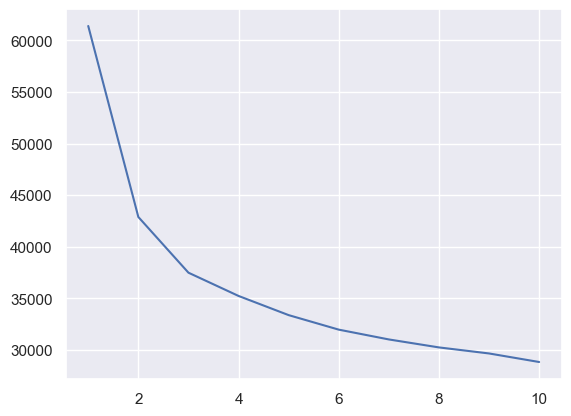

In [119]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(opTallinn)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);


In [120]:
#Performing K-means with K 4 now, adding a column with cluster assignments
model = KMeans(n_clusters=3)
model.fit(opTallinn)
clusters = model.predict(opTallinn)
model.cluster_centers_
opTallinn['clusters'] = clusters
opTallinn.clusters.value_counts()

clusters
2    429
0    396
1    174
Name: count, dtype: int64

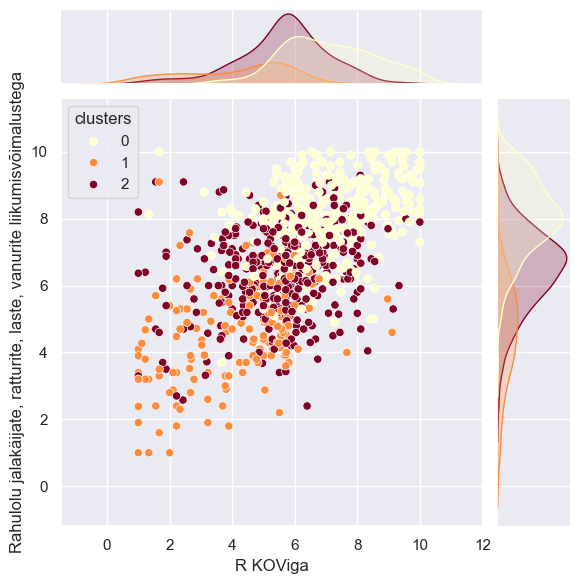

In [122]:
sns.jointplot(x='R KOViga', y='Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega', data=opTallinn, hue='clusters', palette='YlOrRd');

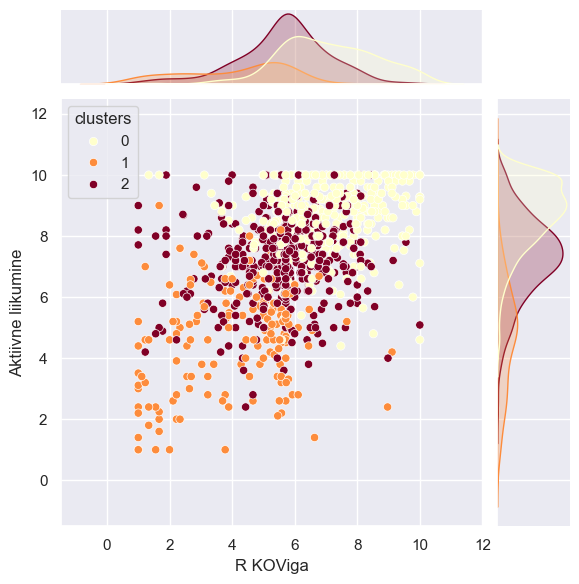

In [124]:
sns.jointplot(x='R KOViga', y='Aktiivne liikumine', data=opTallinn, hue='clusters', palette='YlOrRd');

In [125]:
opTallinn['Klastri_keskm_rahulolu']= opTallinn.groupby('clusters')['Üldrahulolu'].transform('mean')

In [129]:
üldrahul= opTallinn.groupby('clusters').mean().sort_values(by='Üldrahulolu')
üldrahul

,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,Rahulolu ühistranspordiga,R jäätmekäitlusega,Paki- ja pangaautomaadid,R kultuursete vaba aja veetmise võimalustega,Puhas loodus,Osalen ja mõjutan kogukonnaelu,Rahulolu ja kogukonna maine,Klastri_keskm_rahulolu
clusters,,,,,,,,,,,,,,,,,,
1,4.946489,4.139792,5.34783,5.884955,5.386600,4.318349,4.733453,6.004067,4.623693,4.674656,5.748630,5.041157,5.425573,4.365582,5.109022,3.095208,4.966127,4.946489
2,6.739322,5.626659,7.24972,7.365996,6.759122,6.778428,7.284534,8.264206,6.454688,6.363660,7.598743,7.270837,7.002487,6.462098,7.057961,3.530663,7.536487,6.739322
0,8.121022,7.059502,8.94601,8.454147,8.058237,8.442172,8.722914,9.489848,8.064608,7.925179,8.872994,8.612592,8.664205,8.290571,8.474454,4.120235,9.141683,8.121022


In [130]:
dfm = üldrahul.melt(ignore_index=False).reset_index()

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\4168550123.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'Üldrahulolu'),
 Text(1, 0, 'R KOViga'),
 Text(2, 0, 'R turvalisus'),
 Text(3, 0, 'Kooli ja arsti lähedus'),
 Text(4, 0, 'Rahulolu eluruumiga'),
 Text(5, 0, 'Avalikud hooned/miljöö'),
 Text(6, 0, 'Aktiivne liikumine'),
 Text(7, 0, 'Rahulolu asukohaga'),
 Text(8, 0, 'Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'),
 Text(9, 0, 'Rahulolu autoga liikudes'),
 Text(10, 0, 'Rahulolu ühistranspordiga'),
 Text(11, 0, 'R jäätmekäitlusega'),
 Text(12, 0, 'Paki- ja pangaautomaadid'),
 Text(13, 0, 'R kultuursete vaba aja veetmise võimalustega'),
 Text(14, 0, 'Puhas loodus'),
 Text(15, 0, 'Osalen ja mõjutan kogukonnaelu'),
 Text(16, 0, 'Rahulolu ja kogukonna maine'),
 Text(17, 0, 'Klastri_keskm_rahulolu')]

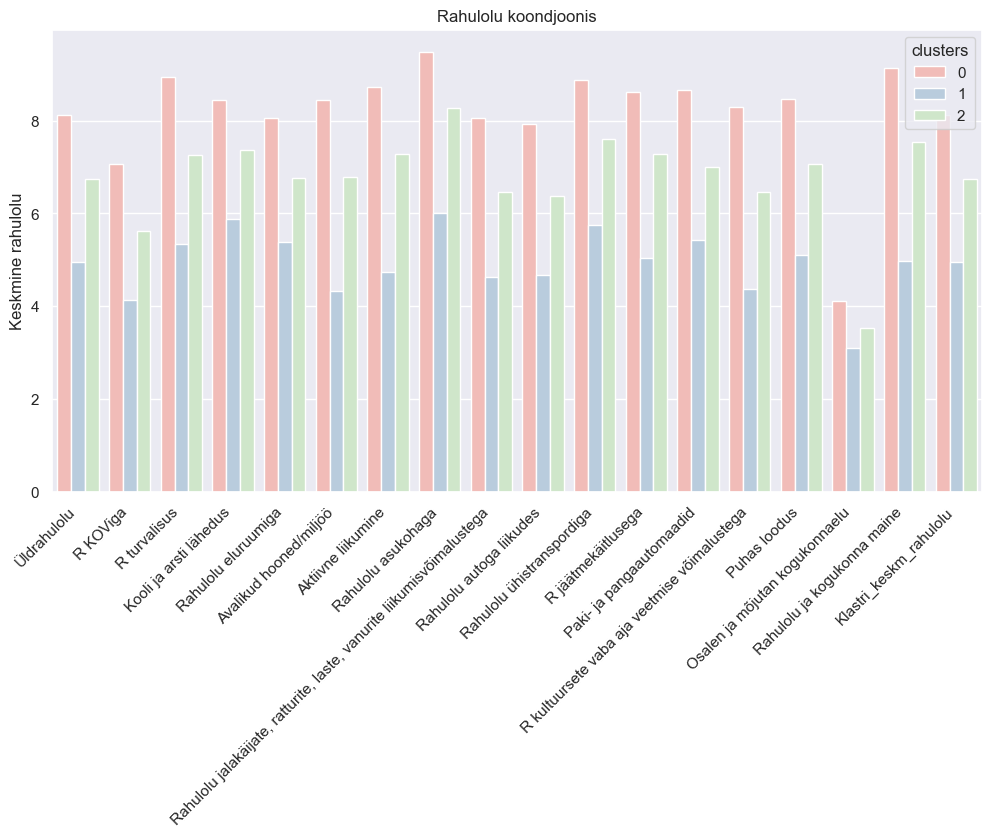

In [134]:
#sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfm, x='variable', y='value', hue='clusters', palette='Pastel1')
ax.set_title("Rahulolu koondjoonis")
ax.set_xlabel("")
ax.set_ylabel("Keskmine rahulolu")
#ax.tick_params(axis='x', labelrotation=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\3032235645.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'R KOViga'),
 Text(1, 0, 'R turvalisus'),
 Text(2, 0, 'Kooli ja arsti lähedus'),
 Text(3, 0, 'Rahulolu eluruumiga'),
 Text(4, 0, 'Avalikud hooned/miljöö'),
 Text(5, 0, 'Aktiivne liikumine'),
 Text(6, 0, 'Rahulolu asukohaga'),
 Text(7, 0, 'Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'),
 Text(8, 0, 'Rahulolu autoga liikudes'),
 Text(9, 0, 'Rahulolu ühistranspordiga'),
 Text(10, 0, 'R jäätmekäitlusega'),
 Text(11, 0, 'Paki- ja pangaautomaadid'),
 Text(12, 0, 'R kultuursete vaba aja veetmise võimalustega'),
 Text(13, 0, 'Puhas loodus'),
 Text(14, 0, 'Osalen ja mõjutan kogukonnaelu')]

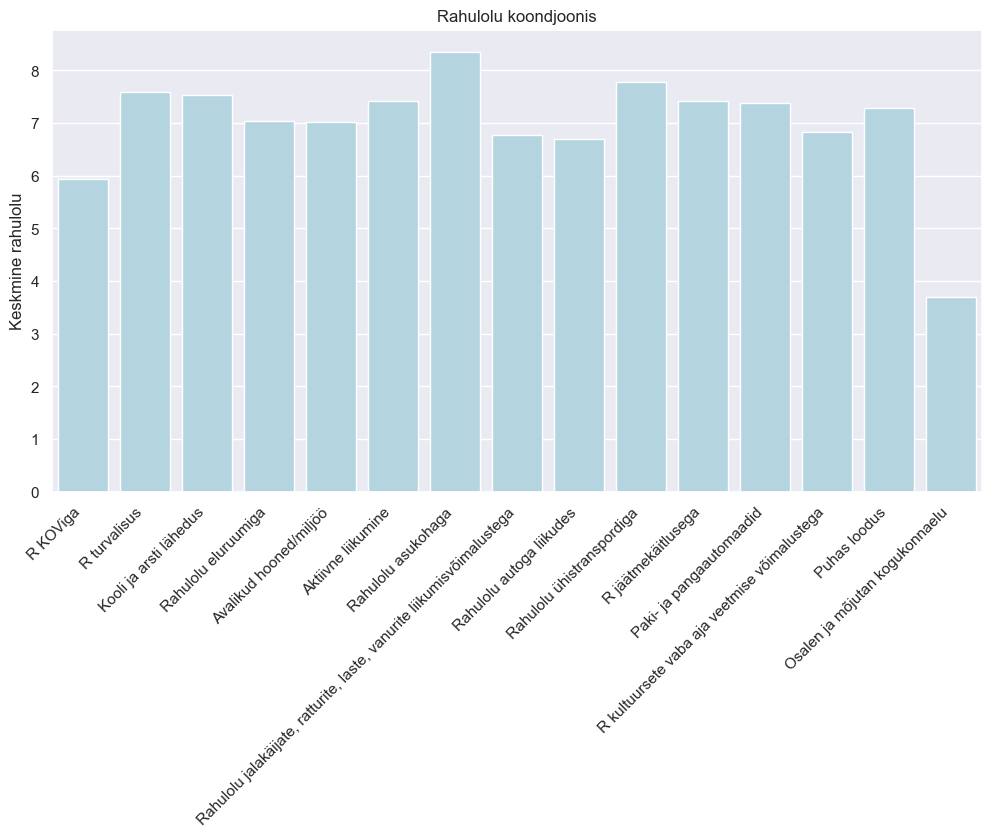

In [139]:
#sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=opTallinn.iloc[:, 1:16].mean(), color='#ADD8E6')
ax.set_title("Rahulolu koondjoonis")
ax.set_xlabel("")
ax.set_ylabel("Keskmine rahulolu")
#ax.tick_params(axis='x', labelrotation=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [140]:
Tallinn.head()

,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,...,Mittetöötav/kodune,Ajateenija,Muutegevusvorm,Sissetulek,Laste arv,Kodutüüp,Liigub jalgsi igapäevaselt,Liigub rattaga kui ilm võimaldab igapäevaselt,Mootorrattur,Piirkonnatüüp (linn/maa)
1,9.566694,8.981680,9.5,10.00,8.666667,10.000000,10.0,10.000000,9.90000,10.0,...,0,0,0,4.0,0,1,1,2,0,1.0
2,7.003174,5.715136,8.0,8.75,5.000000,8.000000,7.4,9.333333,7.07058,4.6,...,0,0,0,3.0,0,1,1,2,0,1.0
3,9.215385,9.111111,9.0,6.25,8.666667,10.000000,10.0,9.333333,9.90000,9.6,...,0,0,0,8.0,0,1,1,2,0,1.0
4,7.707692,5.888889,9.5,7.50,8.666667,7.666667,9.4,10.000000,7.00000,6.2,...,0,0,0,2.0,2,1,1,1,0,1.0
5,7.076923,3.666667,8.0,9.00,10.000000,10.000000,9.0,10.000000,6.40000,4.6,...,0,0,0,2.0,0,1,1,2,0,1.0


In [142]:
## Encoding municipalities 
oe = OrdinalEncoder()
Tallinn['Linnaosa_enc'] = oe.fit_transform(Tallinn[['Linnaosa (Tallinn)']])
linnaosad = Tallinn[['Linnaosa_enc', 'Linnaosa (Tallinn)']].drop_duplicates()
Tallinn.head()

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\3052952739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tallinn['Linnaosa_enc'] = oe.fit_transform(Tallinn[['Linnaosa (Tallinn)']])


,Üldrahulolu,R KOViga,R turvalisus,Kooli ja arsti lähedus,Rahulolu eluruumiga,Avalikud hooned/miljöö,Aktiivne liikumine,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,...,Ajateenija,Muutegevusvorm,Sissetulek,Laste arv,Kodutüüp,Liigub jalgsi igapäevaselt,Liigub rattaga kui ilm võimaldab igapäevaselt,Mootorrattur,Piirkonnatüüp (linn/maa),Linnaosa_enc
1,9.566694,8.981680,9.5,10.00,8.666667,10.000000,10.0,10.000000,9.90000,10.0,...,0,0,4.0,0,1,1,2,0,1.0,0.0
2,7.003174,5.715136,8.0,8.75,5.000000,8.000000,7.4,9.333333,7.07058,4.6,...,0,0,3.0,0,1,1,2,0,1.0,1.0
3,9.215385,9.111111,9.0,6.25,8.666667,10.000000,10.0,9.333333,9.90000,9.6,...,0,0,8.0,0,1,1,2,0,1.0,1.0
4,7.707692,5.888889,9.5,7.50,8.666667,7.666667,9.4,10.000000,7.00000,6.2,...,0,0,2.0,2,1,1,1,0,1.0,5.0
5,7.076923,3.666667,8.0,9.00,10.000000,10.000000,9.0,10.000000,6.40000,4.6,...,0,0,2.0,0,1,1,2,0,1.0,2.0


C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\98101848.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


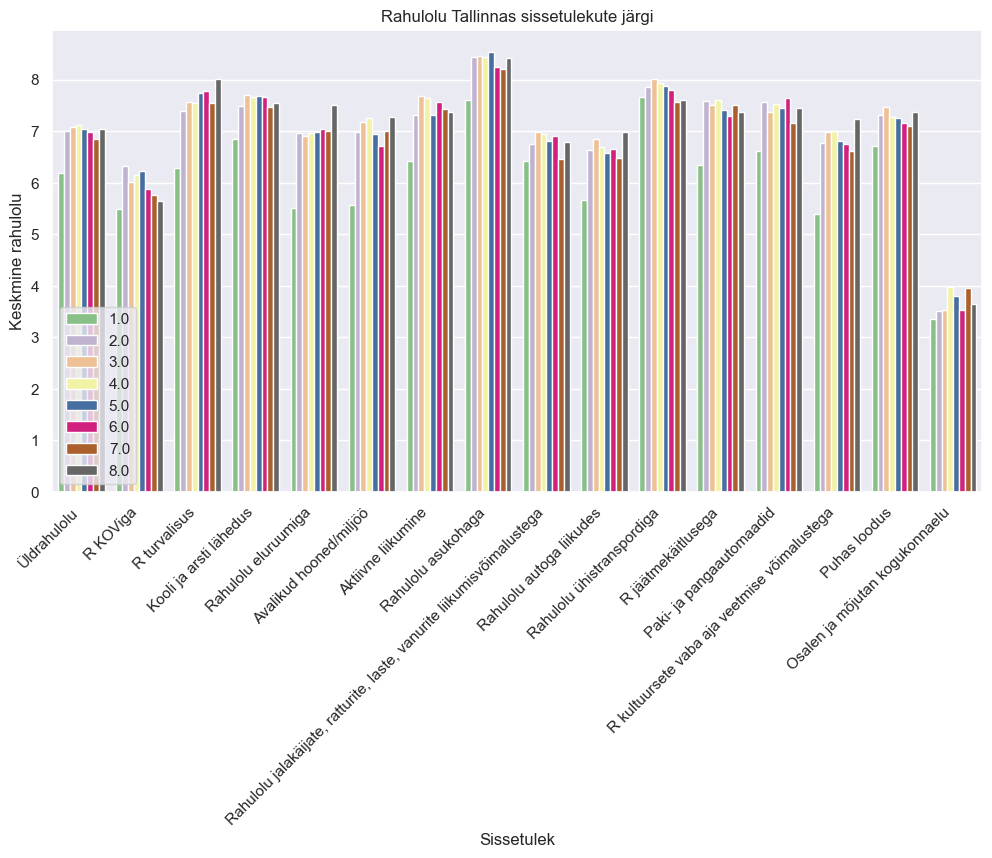

In [147]:
Tlns= Tallinn.iloc[:, :16]
Tlns['Sissetulek'] = Tallinn['Sissetulek']
Tlns.set_index('Sissetulek', inplace=True)
Tlnswide= Tlns.groupby('Sissetulek').mean()
Tlnslong = Tlnswide.melt(ignore_index=False).reset_index()

#sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=Tlnslong, x='variable', y='value', hue='Sissetulek', palette='Accent')
ax.set_title("Rahulolu Tallinnas sissetulekute järgi")
ax.set_xlabel("Sissetulek")
ax.set_ylabel("Keskmine rahulolu")
#ax.tick_params(axis='x', labelrotation=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.legend(loc='lower left')

In [149]:
Tln= Tallinn.iloc[:, :17]
Tln['linnaosa'] = Tallinn['Linnaosa (Tallinn)']
Tln.set_index('linnaosa', inplace=True)
Tlnwide= Tln.groupby('linnaosa').mean()

In [151]:
Tlnlong = Tlnwide.melt(ignore_index=False).reset_index()

In [153]:
Tlnalong = Tlnlong.replace(['Üldrahulolu', 'R KOViga', 'R turvalisus', 'Kooli ja arsti lähedus', 'Rahulolu eluruumiga', 'Avalikud hooned/miljöö', 
                             'Aktiivne liikumine', 'Rahulolu asukohaga', 'Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega', 
                             'Rahulolu autoga liikudes', 'Rahulolu ühistranspordiga', 'R jäätmekäitlusega', 'Paki- ja pangaautomaadid', 
                             'R kultuursete vaba aja veetmise võimalustega', 'Puhas loodus', 'Osalen ja mõjutan kogukonnaelu', 'Rahulolu ja kogukonna maine'], 
                            ['Overall satisfaction', 'Municipal gov satisfaction', 'Perceived safety', 'Accessibility to schools and medicine', 
                             'Satisfaction with housing', 'Public areas / architecture', 'Sports/recreation', 'Location', 'Perceived traffic safety for pedestrians', 
                             'Motor vehicle convenience', 'Public transport', 'Recycling', 'Accessibility to banks/parcel machines', 
                             'Cultural recreation', 'Clean nature / environment', 'Involvement in community life', 'Community reputation'], inplace=True)
                            

In [155]:
Eesti = combined_df.iloc[:, : op_end] 

In [157]:
Eesti.columns = ['Overall satisfaction', 'Municipal gov satisfaction', 'Perceived safety', 'Accessibility to schools and medicine', 
                             'Satisfaction with housing', 'Public areas / architecture', 'Sports/recreation', 'Location', 'Perceived traffic safety for pedestrians', 
                             'Motor vehicle convenience', 'Public transport', 'Recycling', 'Accessibility to banks/parcel machines', 
                             'Cultural recreation', 'Clean nature / environment', 'Involvement in community life', 'Community reputation']
                            

In [159]:
Eesti.head()

,Overall satisfaction,Municipal gov satisfaction,Perceived safety,Accessibility to schools and medicine,Satisfaction with housing,Public areas / architecture,Sports/recreation,Location,Perceived traffic safety for pedestrians,Motor vehicle convenience,Public transport,Recycling,Accessibility to banks/parcel machines,Cultural recreation,Clean nature / environment,Involvement in community life,Community reputation
0,5.800000,4.222222,9.0,7.75,6.333333,5.000000,4.2,4.333333,6.00000,7.6,5.000000,4.500000,5.5,3.0,9.333333,4.0,3.333333
1,9.566694,8.981680,9.5,10.00,8.666667,10.000000,10.0,10.000000,9.90000,10.0,10.000000,9.000000,9.5,10.0,9.666667,10.0,10.000000
2,7.003174,5.715136,8.0,8.75,5.000000,8.000000,7.4,9.333333,7.07058,4.6,8.333333,7.032157,9.0,9.0,8.333333,3.0,8.666667
3,9.215385,9.111111,9.0,6.25,8.666667,10.000000,10.0,9.333333,9.90000,9.6,10.000000,10.000000,10.0,10.0,9.333333,4.5,10.000000
4,7.707692,5.888889,9.5,7.50,8.666667,7.666667,9.4,10.000000,7.00000,6.2,8.000000,9.500000,7.5,6.0,9.000000,6.0,9.333333


C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\1699979131.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


[Text(0.5, 0, '')]

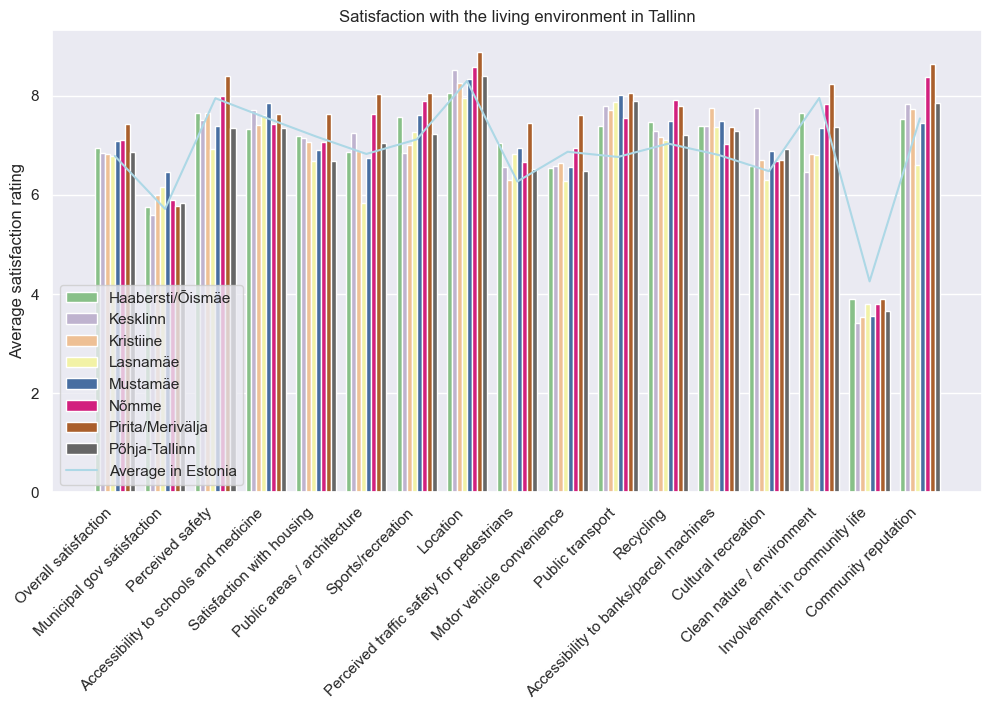

In [161]:
#sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=Tlnlong, x='variable', y='value', hue='linnaosa', palette='Accent')
ax2 = sns.lineplot(data=Eesti.mean(), color='#ADD8E6', label='Average in Estonia')

ax.set_title("Satisfaction with the living environment in Tallinn")
ax.set_ylabel("Average satisfaction rating")
#ax.tick_params(axis='x', labelrotation=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.legend(loc='lower left')
ax.set(xlabel=None)

# Save figure into file:
# plt.savefig('11.pdf', bbox_inches='tight',dpi=300) 

## Traffic accident data

In [164]:
onnetus.shape

(17412, 54)

In [180]:
Tallinnaliiklus = liiklus.join(Tlnwide)
Tallinnaliiklus

,õnnetuste arv,Hukkunuid,Vigastatuid,Isikuid,Joobes mootorsõidukijuhi osalusel,Kergliikurijuhi osalusel,Jalakäija osalusel,Kaassõitja osalusel,Maastikusõiduki juhi osalusel,Jalgratturi osalusel,...,Rahulolu asukohaga,"Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega",Rahulolu autoga liikudes,Rahulolu ühistranspordiga,R jäätmekäitlusega,Paki- ja pangaautomaadid,R kultuursete vaba aja veetmise võimalustega,Puhas loodus,Osalen ja mõjutan kogukonnaelu,Rahulolu ja kogukonna maine
Linnaosa,,,,,,,,,,,,,,,,,,,,,
Haabersti/Õismäe,478,7,552,928.0,26.0,18.0,139.0,113.0,1.0,100.0,...,8.047209,7.047444,6.549448,7.396110,7.463690,7.377469,6.581451,7.642939,3.900033,7.525137
Kesklinn,1644,21,1845,3242.0,60.0,149.0,587.0,404.0,1.0,220.0,...,8.513084,6.553752,6.580720,7.783832,7.278269,7.384887,7.755209,6.460581,3.423756,7.825538
Kristiine,512,10,576,1040.0,16.0,32.0,174.0,117.0,1.0,73.0,...,8.255639,6.304303,6.633988,7.700076,7.167517,7.754963,6.702016,6.820170,3.535336,7.726367
Lasnamäe,1113,23,1273,2232.0,66.0,49.0,398.0,257.0,0.0,109.0,...,7.942224,6.817225,6.272042,7.871369,7.097182,7.360054,6.295500,6.799776,3.793328,6.602877
Mustamäe,625,15,669,1215.0,32.0,33.0,254.0,130.0,1.0,65.0,...,8.330688,6.944322,6.562019,8.021477,7.486751,7.489399,6.875938,7.348892,3.564913,7.451053
Nõmme,481,7,551,941.0,28.0,10.0,119.0,104.0,2.0,103.0,...,8.567566,6.658712,6.940606,7.543979,7.911876,7.019725,6.678976,7.838519,3.802974,8.380215
Pirita/Merivälja,273,4,313,493.0,18.0,13.0,55.0,53.0,0.0,79.0,...,8.874669,7.446853,7.604396,8.058633,7.798204,7.376611,6.705699,8.228856,3.897174,8.631544
Põhja-Tallinn,700,10,775,1298.0,47.0,75.0,279.0,120.0,0.0,128.0,...,8.388284,6.529381,6.488886,7.884125,7.199029,7.292824,6.926007,7.374400,3.648891,7.843095


In [182]:
Tallinnaliiklus['Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'].corr(Tallinnaliiklus['Hukkunuid/10000 elaniku kohta'])

-0.46066450063099945

C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\2376979274.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=10-Tallinnaliiklus['Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'], label='Perceived danger of traffic', palette='Pastel1')
C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\2376979274.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=Tallinnaliiklus['Vigastatuid/1000']/10, label='People injured (per 100 inhabitants)', palette='Pastel1')
C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\2376979274.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=Tallinnaliiklus['Hukkunuid/km2'], label='People injured (per 0.1 km2)', palette='Pastel1')
C:\Users\Liisa\AppData\Local\Temp\ipykernel_5532\

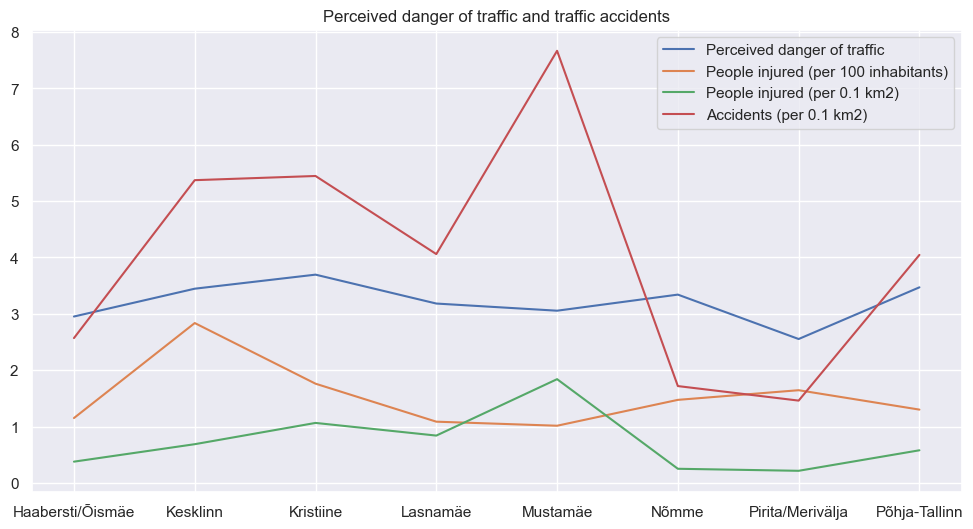

In [184]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=10-Tallinnaliiklus['Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'], label='Perceived danger of traffic', palette='Pastel1')
ax2 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=Tallinnaliiklus['Vigastatuid/1000']/10, label='People injured (per 100 inhabitants)', palette='Pastel1')
ax2 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=Tallinnaliiklus['Hukkunuid/km2'], label='People injured (per 0.1 km2)', palette='Pastel1')
ax2 = sns.lineplot(data=Tallinnaliiklus, x='Linnaosa', y=Tallinnaliiklus['Õnnetusi/ km2']/10, label='Accidents (per 0.1 km2)', palette='Pastel1')

ax1.set_title("Perceived danger of traffic and traffic accidents")


ax1.set(xlabel=None)
ax1.set(ylabel=None)

plt.savefig('211.pdf') 

In [245]:
pearsonr(Tallinnaliiklus['Rahulolu jalakäijate, ratturite, laste, vanurite liikumisvõimalustega'], Tallinnaliiklus['Vigastatuid/1000'])

PearsonRResult(statistic=-0.3156801826508789, pvalue=0.4462475174592001)

Disclaimer 1: I lost some of the work due to tehchical issues (coffee met laptop keyboard), thus the figures above are not the same as on the presentation. Disclaimer 2: The correlations above have little meaning due to the low n. 

## Regression

In [332]:
## Here I tried out, if some of the features can be modelled, unfortunately without great results.

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#Tallinn['Linnaosa_enc'] = oe.fit_transform(Tallinn[['Linnaosa (Tallinn)']])
#linnaosad = Tallinn[['Linnaosa_enc', 'Linnaosa (Tallinn)']].drop_duplicates()

In [258]:
from sklearn.model_selection import train_test_split
Tallinn = Tallinn.dropna()
y = Tallinn['Üldrahulolu']
X = Tallinn[[	
             'Ettevõtja/vabakutseline',	'Lühiajaline_töötu', 'Pikaajaline_töötu',
             'Töövõimetu', 'Vanaduspensionär', 'Üliõpilane', 'Muutegevusvorm',
           	]]
# Subset for only the 1-10 answers. 
# X = numericTallinn[:, 16:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train.shape

(617, 7)

In [260]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
from sklearn.metrics import mean_squared_error

#Linear
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)
linearmean = mean_squared_error(y_test, pred) 

#Ridge
model_ridge = Ridge().fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)
ridgemean = mean_squared_error(y_test, pred_ridge) 

#Lasso
model_lasso = Lasso().fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
lassomean = mean_squared_error(y_test, pred_lasso) 

print("Linear: ", linearmean, ". Ridge: ", ridgemean, ". Lasso: ", lassomean)


Linear:  1.7107704531365748 . Ridge:  1.7072540808492545 . Lasso:  1.6896889472190726


In [262]:
print(list(zip(model_lasso.coef_, X_train)))

[(-0.0, 'Ettevõtja/vabakutseline'), (-0.0, 'Lühiajaline_töötu'), (-0.0, 'Pikaajaline_töötu'), (-0.0, 'Töövõimetu'), (0.0, 'Vanaduspensionär'), (-0.0, 'Üliõpilane'), (0.0, 'Muutegevusvorm')]


In [264]:
print(list(zip(model_ridge.coef_, X_train)))

[(-0.14679726223311623, 'Ettevõtja/vabakutseline'), (-1.0785952350603067, 'Lühiajaline_töötu'), (-0.5050887489956167, 'Pikaajaline_töötu'), (-0.23970575520363416, 'Töövõimetu'), (0.3174412170029145, 'Vanaduspensionär'), (-0.19594562841096538, 'Üliõpilane'), (0.5185547639561533, 'Muutegevusvorm')]


In [266]:
from sklearn import metrics
metrics.r2_score(y_test, pred)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, pred))
print('Max Error:', metrics.max_error(y_test, pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, pred))
print('R^2:', metrics.r2_score(y_test, pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, pred))

Mean Absolute Error (MAE): 1.0057586871304558
Mean Squared Error (MSE): 1.7107704531365748
Root Mean Squared Error (RMSE): 1.3079642400068034
Mean Absolute Percentage Error (MAPE): 0.17209443554523485
Explained Variance Score: -0.011442139750021063
Max Error: 5.141182589053999
Mean Squared Log Error: 0.03491289906305692
Median Absolute Error: 0.8602234724711053
R^2: -0.013568781580666212
Mean Poisson Deviance: 0.2655337450909112
Mean Gamma Deviance: 0.04305141972575508


C:\Users\Liisa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Classification

In [268]:
Tallinn['Linnaosa (Tallinn)'].unique()

array(['Haabersti/Õismäe', 'Kesklinn', 'Nõmme', 'Kristiine', 'Lasnamäe',
       'Mustamäe', 'Pirita/Merivälja', 'Põhja-Tallinn'], dtype=object)

In [272]:
X = Tallinn.iloc[:, :17]	

In [274]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
Tallinn['Linnaosa_enc'] = oe.fit_transform(Tallinn[['Linnaosa (Tallinn)']])
linnaosad = Tallinn[['Linnaosa_enc', 'Linnaosa (Tallinn)']].drop_duplicates()

In [276]:
Y = Tallinn['Linnaosa_enc']

In [278]:
import numpy as np
import matplotlib.pyplot as plt



In [280]:
from sklearn.cluster import KMeans

n_clusters = 4
random_state = 1
kmeans = KMeans(n_clusters = n_clusters, random_state= random_state).fit_predict(X)
cluster_assignments = kmeans

In [282]:
numbrid = pd.DataFrame(
    {'targetlabel': cluster_assignments,
     'reallabel':  Tallinn['Linnaosa_enc']
     })

In [284]:
pihtas = 0
põhjas = 0
for i in range(len(numbrid)):
   if numbrid.iloc[i]['targetlabel'] == numbrid.iloc[i]['reallabel']:
        pihtas +=1
   else:
        põhjas +=1
print(pihtas/len(numbrid))

0.12811791383219956


In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape

(617, 17)

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# TODO
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, y_train)

In [290]:
y_pred = rf.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1,  4,  1,  4,  8,  5,  0,  0],
       [ 0, 21,  6,  4,  5,  1,  0,  0],
       [ 1, 13,  5,  6,  8,  5,  1,  0],
       [ 1,  3,  4, 15, 16,  2,  1,  0],
       [ 0,  3,  7,  2,  9,  7,  1,  0],
       [ 4,  4,  4,  1,  2, 12,  0,  0],
       [ 3,  5,  3,  0,  8, 18,  1,  0],
       [ 0,  8,  6,  3,  2, 11,  0,  0]], dtype=int64)

In [295]:
numbrid2 = pd.DataFrame(
    {'target': y_pred,
     'real': y_test
     })

In [297]:
pihtas = 0
põhjas = 0
for i in range(len(numbrid2)):
   if numbrid2.iloc[i]['target'] == numbrid2.iloc[i]['real']:
        pihtas +=1
   else:
        põhjas +=1
print(pihtas/len(numbrid2))

0.24150943396226415


In [299]:
accuracy_before = rf.score(X_test, y_test)
accuracy_before

0.24150943396226415

In [301]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred))

Mean Absolute Error (MAE): 1.860377358490566
Mean Squared Error (MSE): 6.441509433962264
Root Mean Squared Error (RMSE): 2.5380128908187727
Mean Absolute Percentage Error (MAPE): 1274603668123725.8
Explained Variance Score: -0.2787787964268922
Max Error: 6.0
Mean Squared Log Error: 0.533327878960735
Median Absolute Error: 1.0
R^2: -0.32920486600846255


C:\Users\Liisa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.

In [303]:
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

                                              Feature  Importance
1                                            R KOViga    0.100027
6                                  Aktiivne liikumine    0.086615
8   Rahulolu jalakäijate, ratturite, laste, vanuri...    0.081143
14                                       Puhas loodus    0.079554
16                        Rahulolu ja kogukonna maine    0.076433
3                              Kooli ja arsti lähedus    0.075450
5                              Avalikud hooned/miljöö    0.074811
13       R kultuursete vaba aja veetmise võimalustega    0.067246
9                            Rahulolu autoga liikudes    0.065276
0                                         Üldrahulolu    0.062650
15                     Osalen ja mõjutan kogukonnaelu    0.042629
2                                        R turvalisus    0.035823
12                           Paki- ja pangaautomaadid    0.034473
4                                 Rahulolu eluruumiga    0.033672
10        

In [305]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train_selected, y_train)

In [307]:
y_pred2 = rf2.predict(X_test_selected)

In [309]:
accuracy_after = rf2.score(X_test_selected, y_test)
accuracy_after

0.2339622641509434

In [311]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred2, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred2))
print('Max Error:', metrics.max_error(y_test, y_pred2))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred2))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred2))
print('R^2:', metrics.r2_score(y_test, y_pred2))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred2))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred2))

Mean Absolute Error (MAE): 1.879245283018868
Mean Squared Error (MSE): 6.581132075471698
Root Mean Squared Error (RMSE): 2.565371722669387
Mean Absolute Percentage Error (MAPE): 1342582530423657.8
Explained Variance Score: -0.32115655853314506
Max Error: 7.0
Mean Squared Log Error: 0.5419763834103679
Median Absolute Error: 1.0
R^2: -0.35801598495533615


C:\Users\Liisa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.